In [ ]:
import pandas as pd
import mysql.connector
from ds_helper import visualize

conn = mysql.connector.connect(
    host='localhost',
    user='user_name',
    password='password',
    database='retail_db'
)

In [36]:
q1 = {
    "Best-Selling Products": """
        SELECT p.name AS product_name, SUM(s.quantity) AS total_sold
        FROM Sales s
        JOIN Products p ON s.product_id = p.product_id
        GROUP BY p.name
        ORDER BY total_sold DESC;
    """
}
sql_query = q1["Best-Selling Products"] 
df = pd.read_sql(sql_query, conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2124\3719824033.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


## Best-Selling Products


Column: numerical → []

Column: categorical → ['category', 'total_sales']


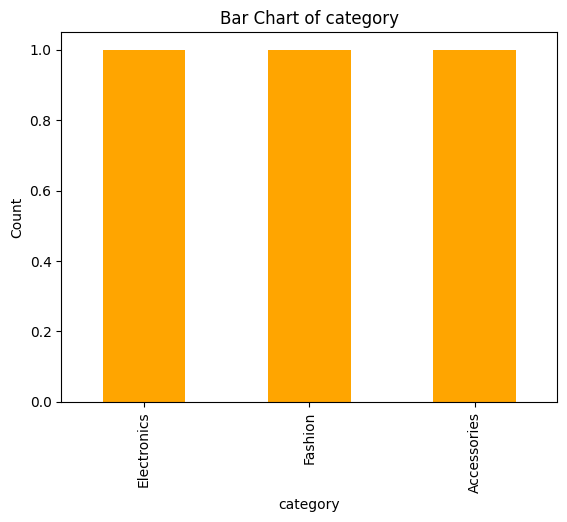

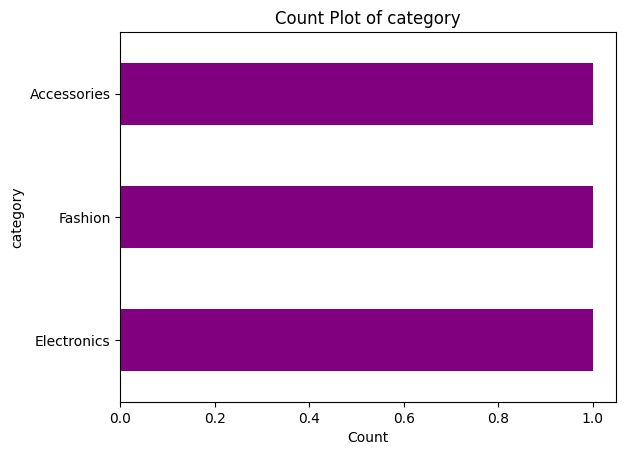

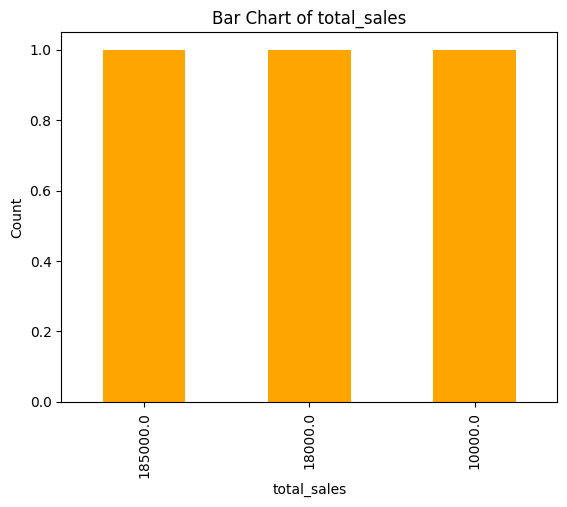

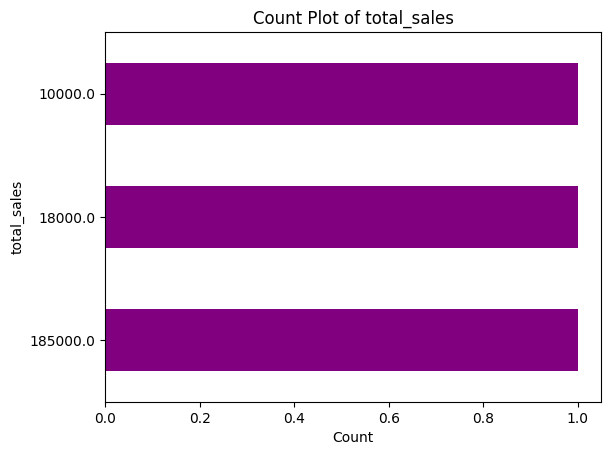


Column: text → []


In [39]:
visualize(df)

#### Bar Chart / Count Plot for product_name
This plot shows that every unique product name is represented exactly once in the aggregated result. This confirms the SQL query's successful grouping, as the GROUP BY clause ensures one row per product, but provides no direct insight into sales volume. The purpose of this specific visualization is simply to validate the structure of the data returned from the database.
#### Bar Chart for total_sold
This chart is the primary result of the query, clearly illustrating the sales performance hierarchy. The bars, sorted from highest to lowest, immediately identify the best-selling products in terms of units sold. This visualization is critical for business decision-making, highlighting the top performers that drive sales volume and should be prioritized in inventory and marketing efforts.

In [38]:
q2={
     "Sales by Category": """
        SELECT p.category, SUM(s.total_amount) AS total_sales
        FROM Sales s
        JOIN Products p ON s.product_id = p.product_id
        GROUP BY p.category
        ORDER BY total_sales DESC;
    """
}
sql_query = q2["Sales by Category"] 
df = pd.read_sql(sql_query, conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2124\3249905807.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


## Total Sales per Product Category


Column: numerical → []

Column: categorical → ['category', 'total_sales']


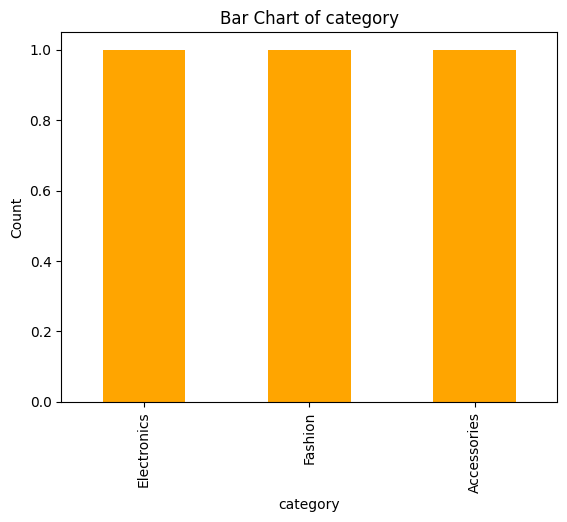

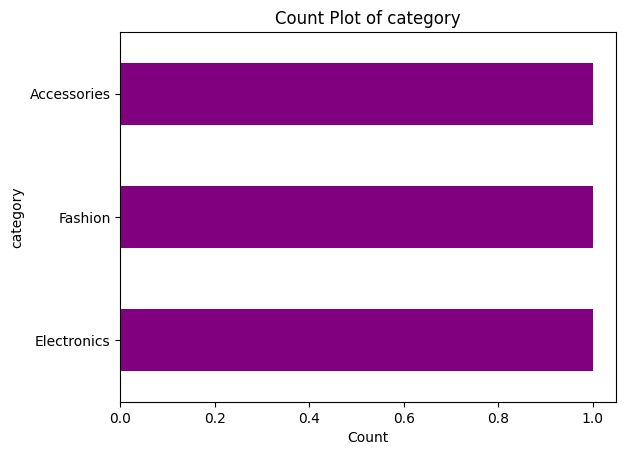

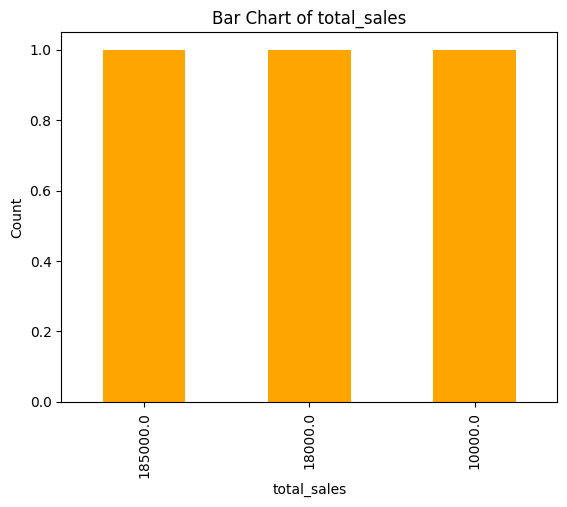

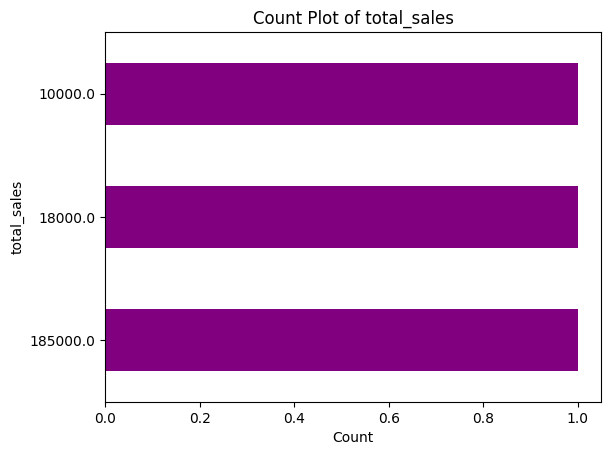


Column: text → []


In [40]:
visualize(df)

#### BBar Chart / Count Plot for category_name
This plot displays the count of each product category in the aggregated dataset. Since your SQL query likely used GROUP BY category_name, this chart confirms that each unique category is present exactly once in the resulting table. It serves as a data integrity check, validating that all sales for a category have been properly summed into a single entry.
#### Bar Chart for total_sales (or revenue)
This is the most significant visualization, showing which business segments generate the most revenue. The bar heights directly represent the financial contribution of each category (e.g., Electronics vs. Apparel). By highlighting the dominant categories, this chart is essential for budget allocation and resource planning, guiding where the company should focus its investment efforts.

In [41]:
q3={
        "Average Purchase per Customer": """
        SELECT c.name AS customer_name, ROUND(AVG(s.total_amount), 2) AS avg_purchase
        FROM Sales s
        JOIN Customers c ON s.customer_id = c.customer_id
        GROUP BY c.name
        ORDER BY avg_purchase DESC;
    """
}
sql_query = q3["Average Purchase per Customer"] 
df = pd.read_sql(sql_query, conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2124\3120113958.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


## Average Purchase per Customer


Column: numerical → []

Column: categorical → ['customer_name', 'avg_purchase']


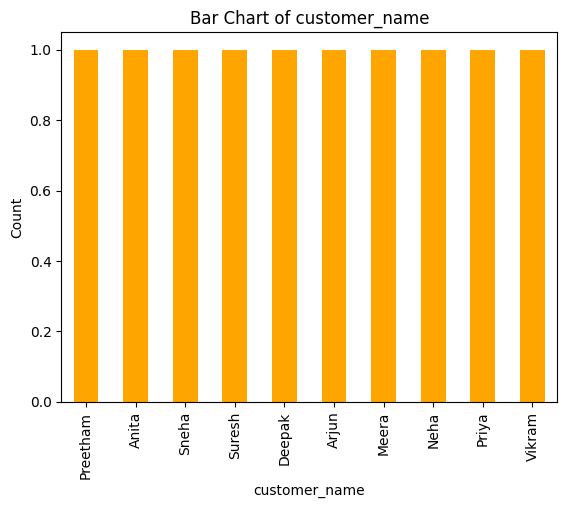

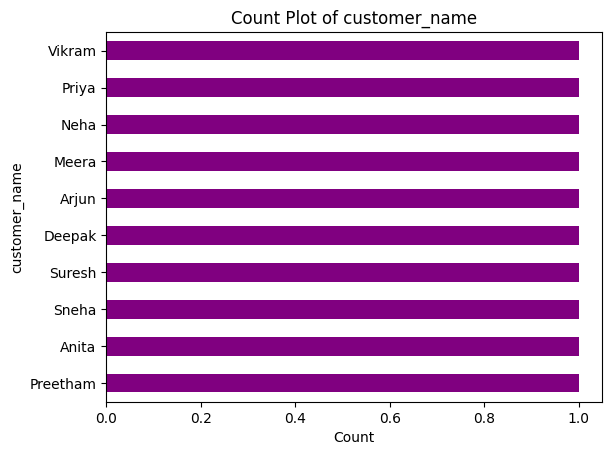

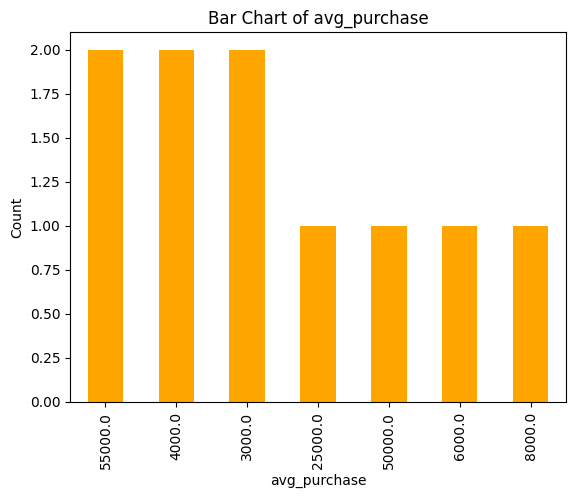

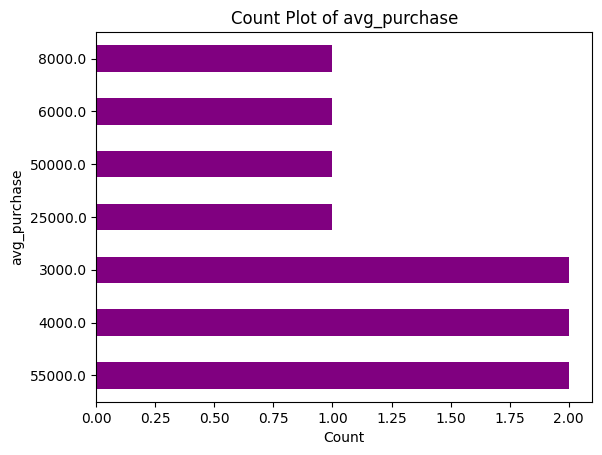


Column: text → []


In [42]:
visualize(df)

#### Bar Chart / Count Plot for customer_name
This plot displays the count of each unique customer name in the resulting dataset. Since your data is grouped by customer, every customer will have a count of one, confirming the proper structure of the aggregated table. This visualization primarily serves as a quick check that the SQL query successfully isolated a single, unique record for each customer.
#### Bar Chart for avg_purchase
This is a highly valuable chart, as it clearly identifies your most financially valuable customers based on their average transaction size. The height of the bars shows the average monetary value per purchase, allowing you to quickly spot customers who make significantly larger transactions than others. This information is key for developing personalized retention strategies and VIP programs to maximize future revenue from these high-value accounts.

In [43]:
q4={
        "Daily Sales Trend": """
        SELECT s.sale_date, SUM(s.total_amount) AS daily_sales
        FROM Sales s
        GROUP BY s.sale_date
        ORDER BY s.sale_date;
    """
}
sql_query = q4["Daily Sales Trend"] 
df = pd.read_sql(sql_query, conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2124\3648583087.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


## Daily Sales Trends


Column: numerical → []

Column: categorical → ['sale_date', 'daily_sales']


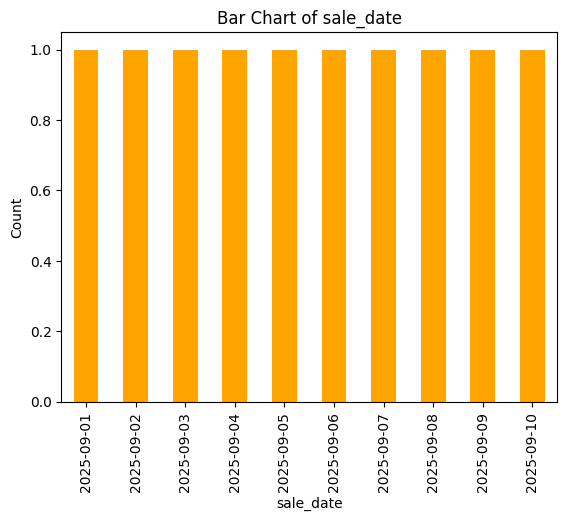

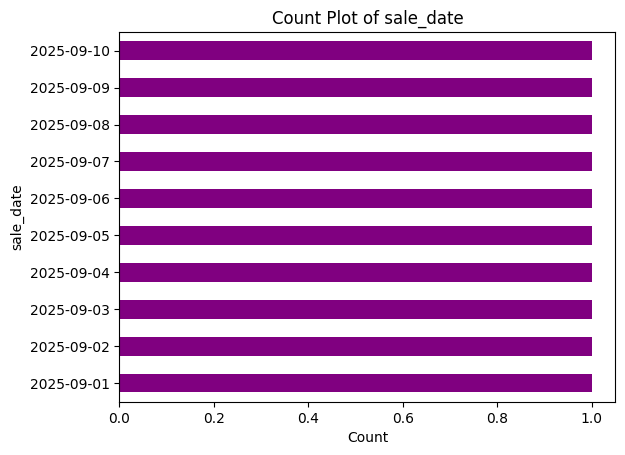

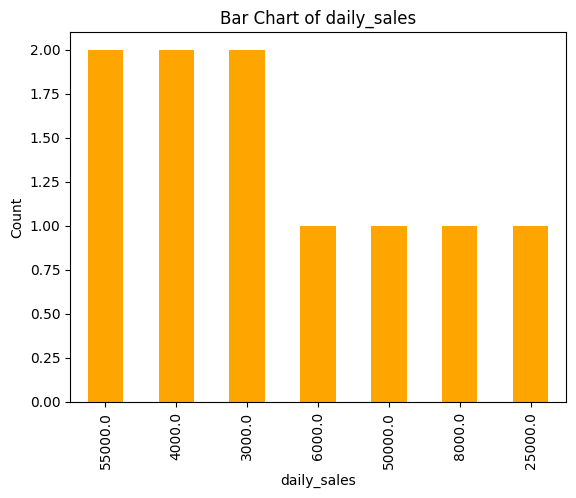

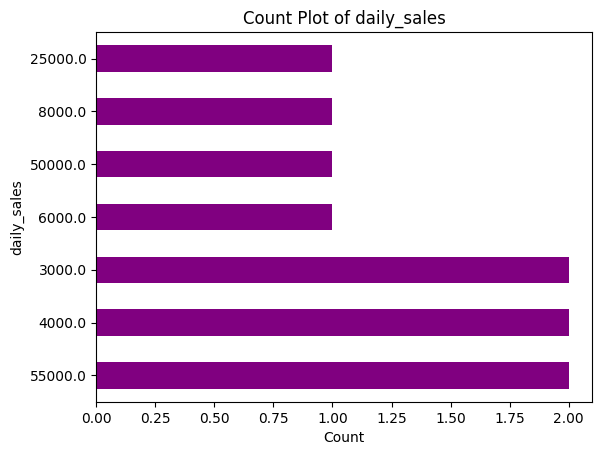


Column: text → []


In [44]:
visualize(df)

#### Count Plot for sale date
This plot displays the count of distinct days present in your dataset. Since the data is aggregated to one record per day, the count for each date will be one, confirming the data is correctly structured for time-series analysis. This graph primarily serves as a quick check to ensure there are no missing or duplicate dates in the final aggregated sales table.
#### Time Series / Line Plot for daily sales
This is the most crucial visualization, as it reveals the sales trend and seasonality over the observed period. By plotting sales value on the Y-axis against time on the X-axis, you can immediately identify peaks, troughs, and consistent patterns (e.g., higher sales on weekends or at month-end). This plot is essential for forecasting, identifying anomalies, and understanding business cycles to optimize operations.